# Crossover Simple Moving Average Cryptocurrency Trading Algorithm

This notebook demonstrates fetching Bitcoin market prices, performing basic market analysis. It shows how to calculate moving averages, generate signals, and backtest performance using Python.

## 1. Importing Libraries
We will start by importing all the Python libraries needed for the analysis.

In [12]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Importing necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

## 2. Fetching Bitcoin Price Data
Using the `yfinance` library, we'll download daily BTC-USD data for January to August 2025.

In [6]:
# Retrieving two weeks of Bitcoin to USD exchange rates with a 1 day interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2025-01-01', end='2025-08-31', interval='1d')
BTC_USD.head()

C:\Users\PACER\AppData\Local\Temp\ipykernel_8344\1194567221.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BTC_USD = yf.download("BTC-USD", start='2025-01-01', end='2025-08-31', interval='1d')


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-01-01,94419.757812,94929.867188,92788.125000,93425.101562,24519888919
2025-01-02,96886.875000,97739.820312,94201.570312,94416.289062,46009564411
2025-01-03,98107.429688,98956.914062,96034.617188,96881.726562,35611391163
2025-01-04,98236.226562,98734.429688,97562.976562,98106.992188,22342608078
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825


## 3. Visualizing Price Trends
We will plot the daily closing price of Bitcoin.

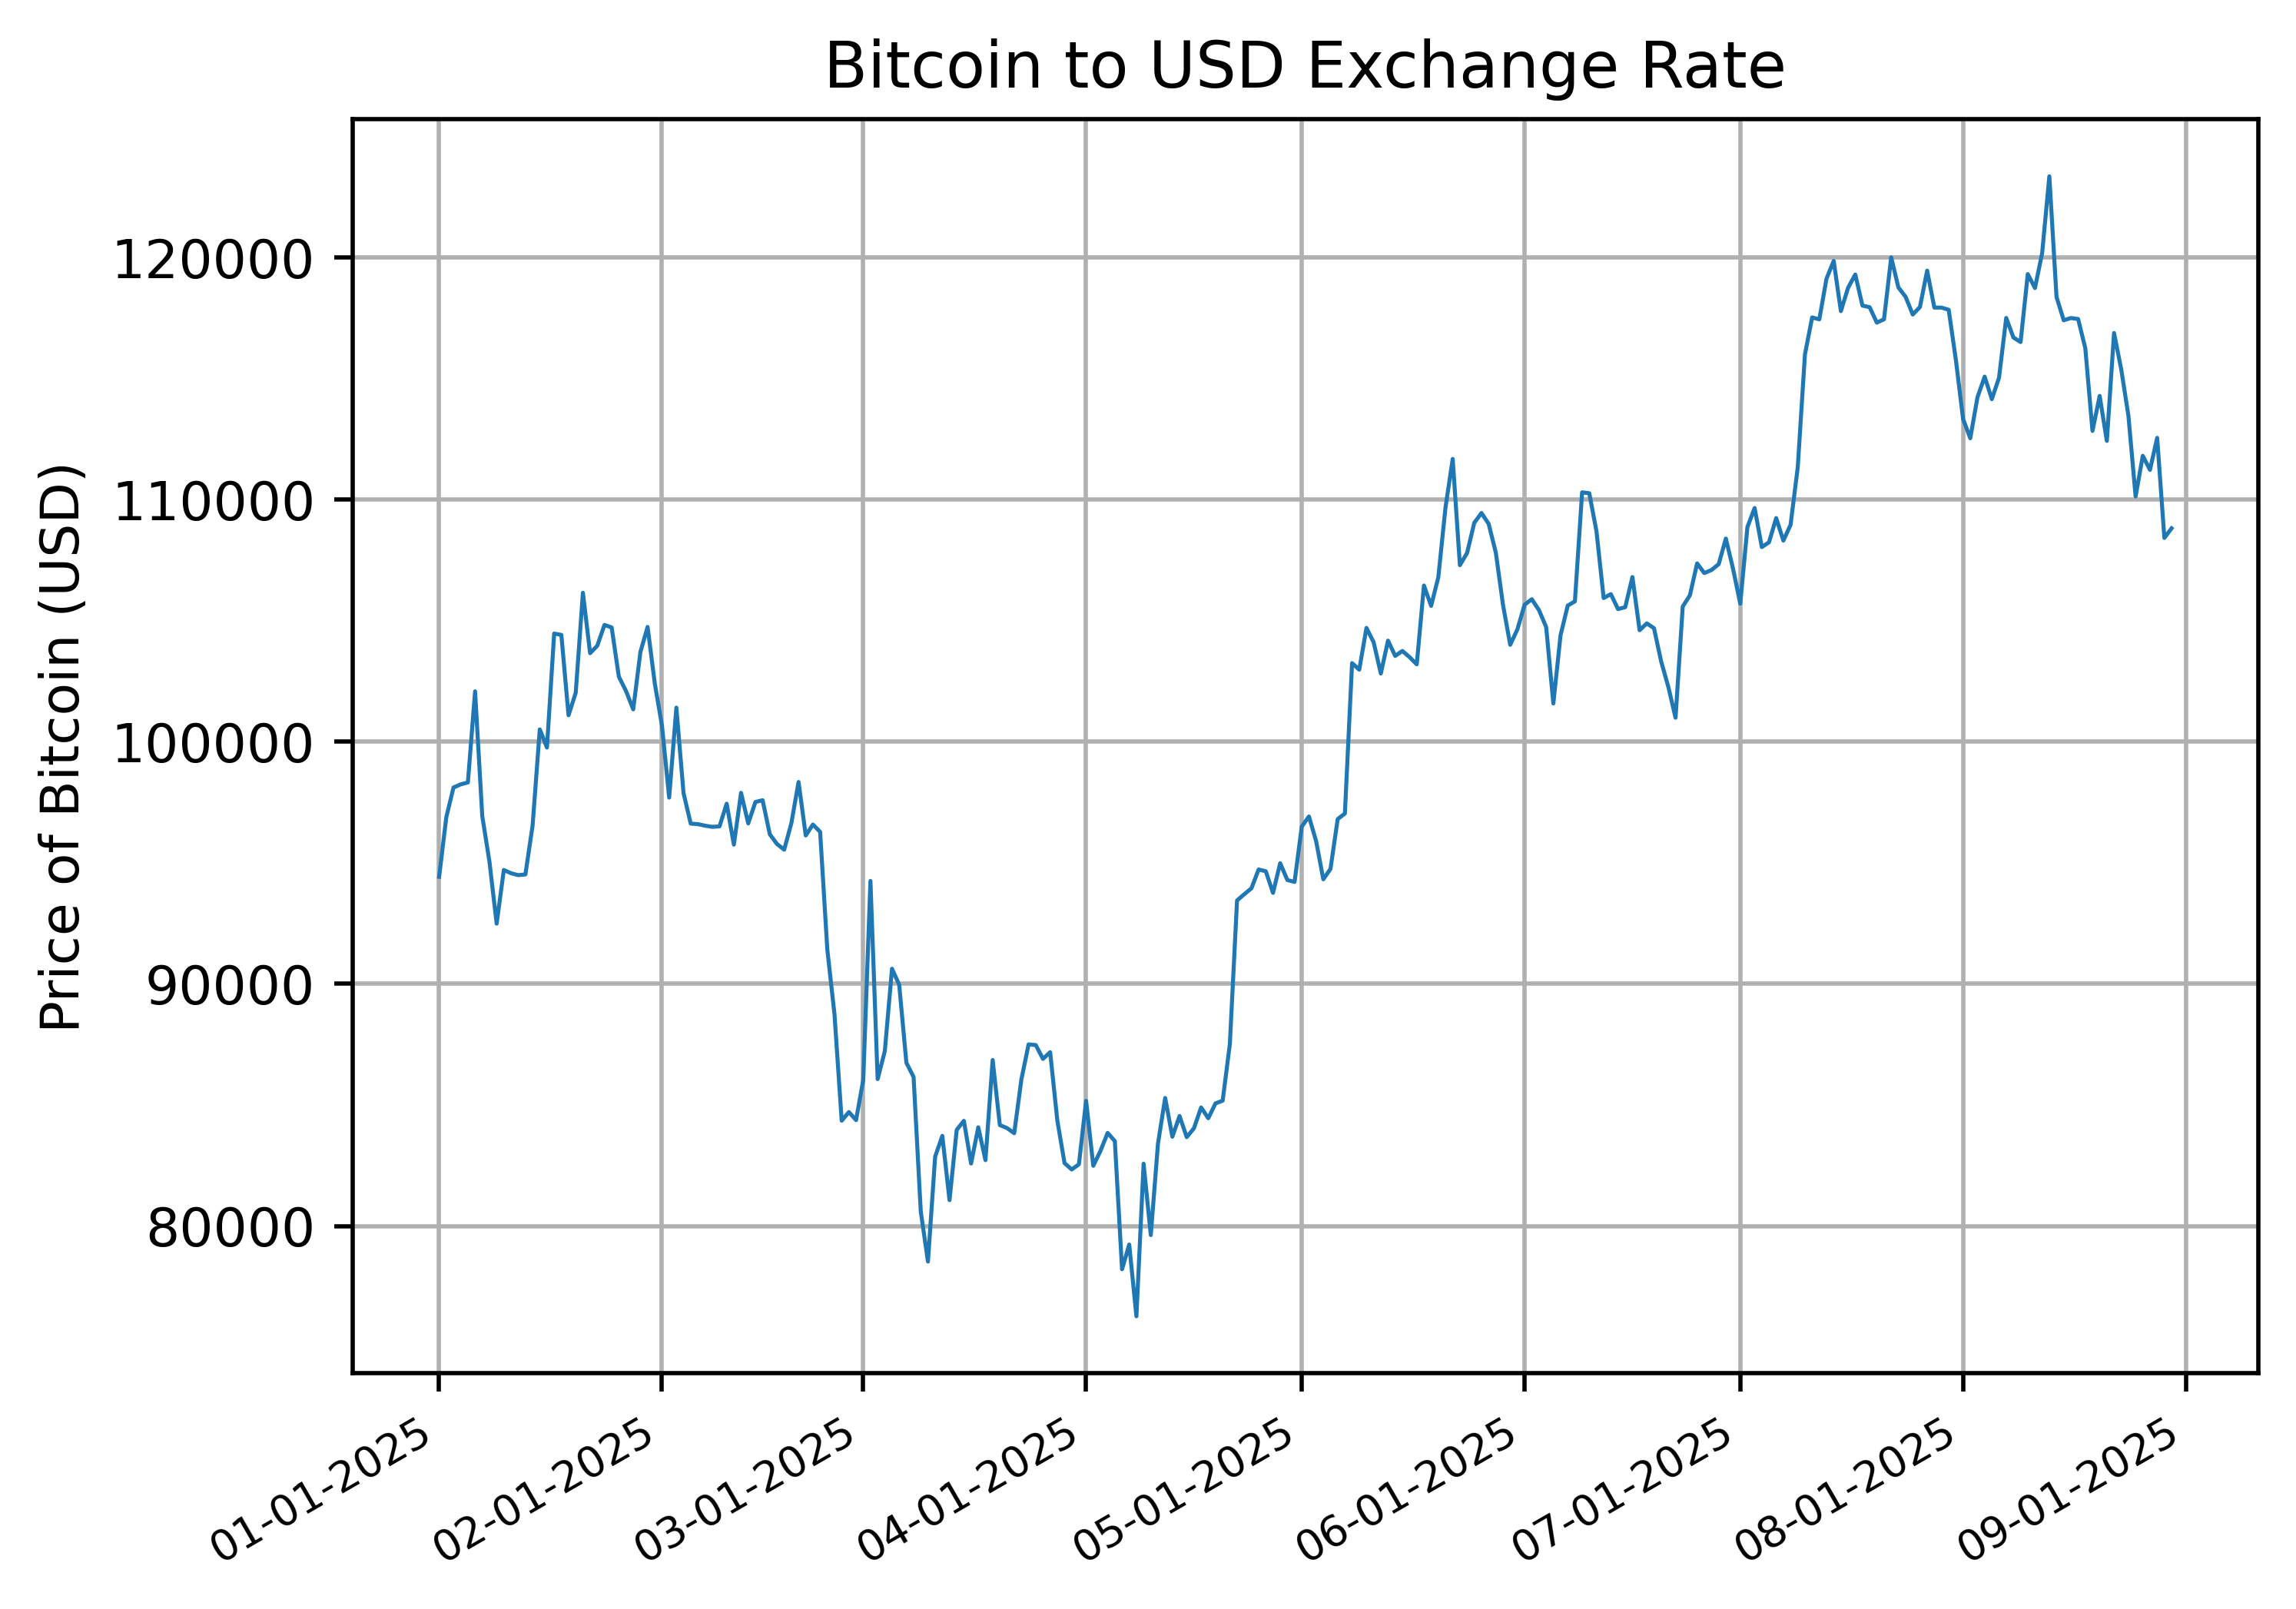

In [15]:
# Generating a price chart 
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
if 'BTC_USD' in globals():
	ax.plot(BTC_USD.index, BTC_USD['Close'], lw=0.75)
else:
	print("BTC_USD is not defined. Please run the cell that defines BTC_USD.")

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart.
plt.show()

## 4. Calculating Moving Averages
We will compute 9-day and 30-day SMAs and plot them alongside the price.

In [8]:
# Computing a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

# Computing a 30-day Simple Moving Average with pandas
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

# Display the last 5 entries of the dataframe
BTC_USD.tail()

Price,Close,High,Low,Open,Volume,SMA_9,SMA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2025-08-26,111802.656250,112397.015625,108762.039062,110124.101562,69396320317,113712.346354,116003.221094
2025-08-27,111222.062500,112619.414062,110398.265625,111795.710938,62137056409,113153.429688,115779.807292
2025-08-28,112544.804688,113450.078125,110900.921875,111219.054688,58860155962,113121.610243,115600.562500
2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644,112470.065104,115286.550781
2025-08-30,108808.070312,108929.351562,107444.445312,108409.406250,51486264208,112068.847222,115054.879687


## 3. Visualizing Price Trends
We will plot the daily closing price of Bitcoin.

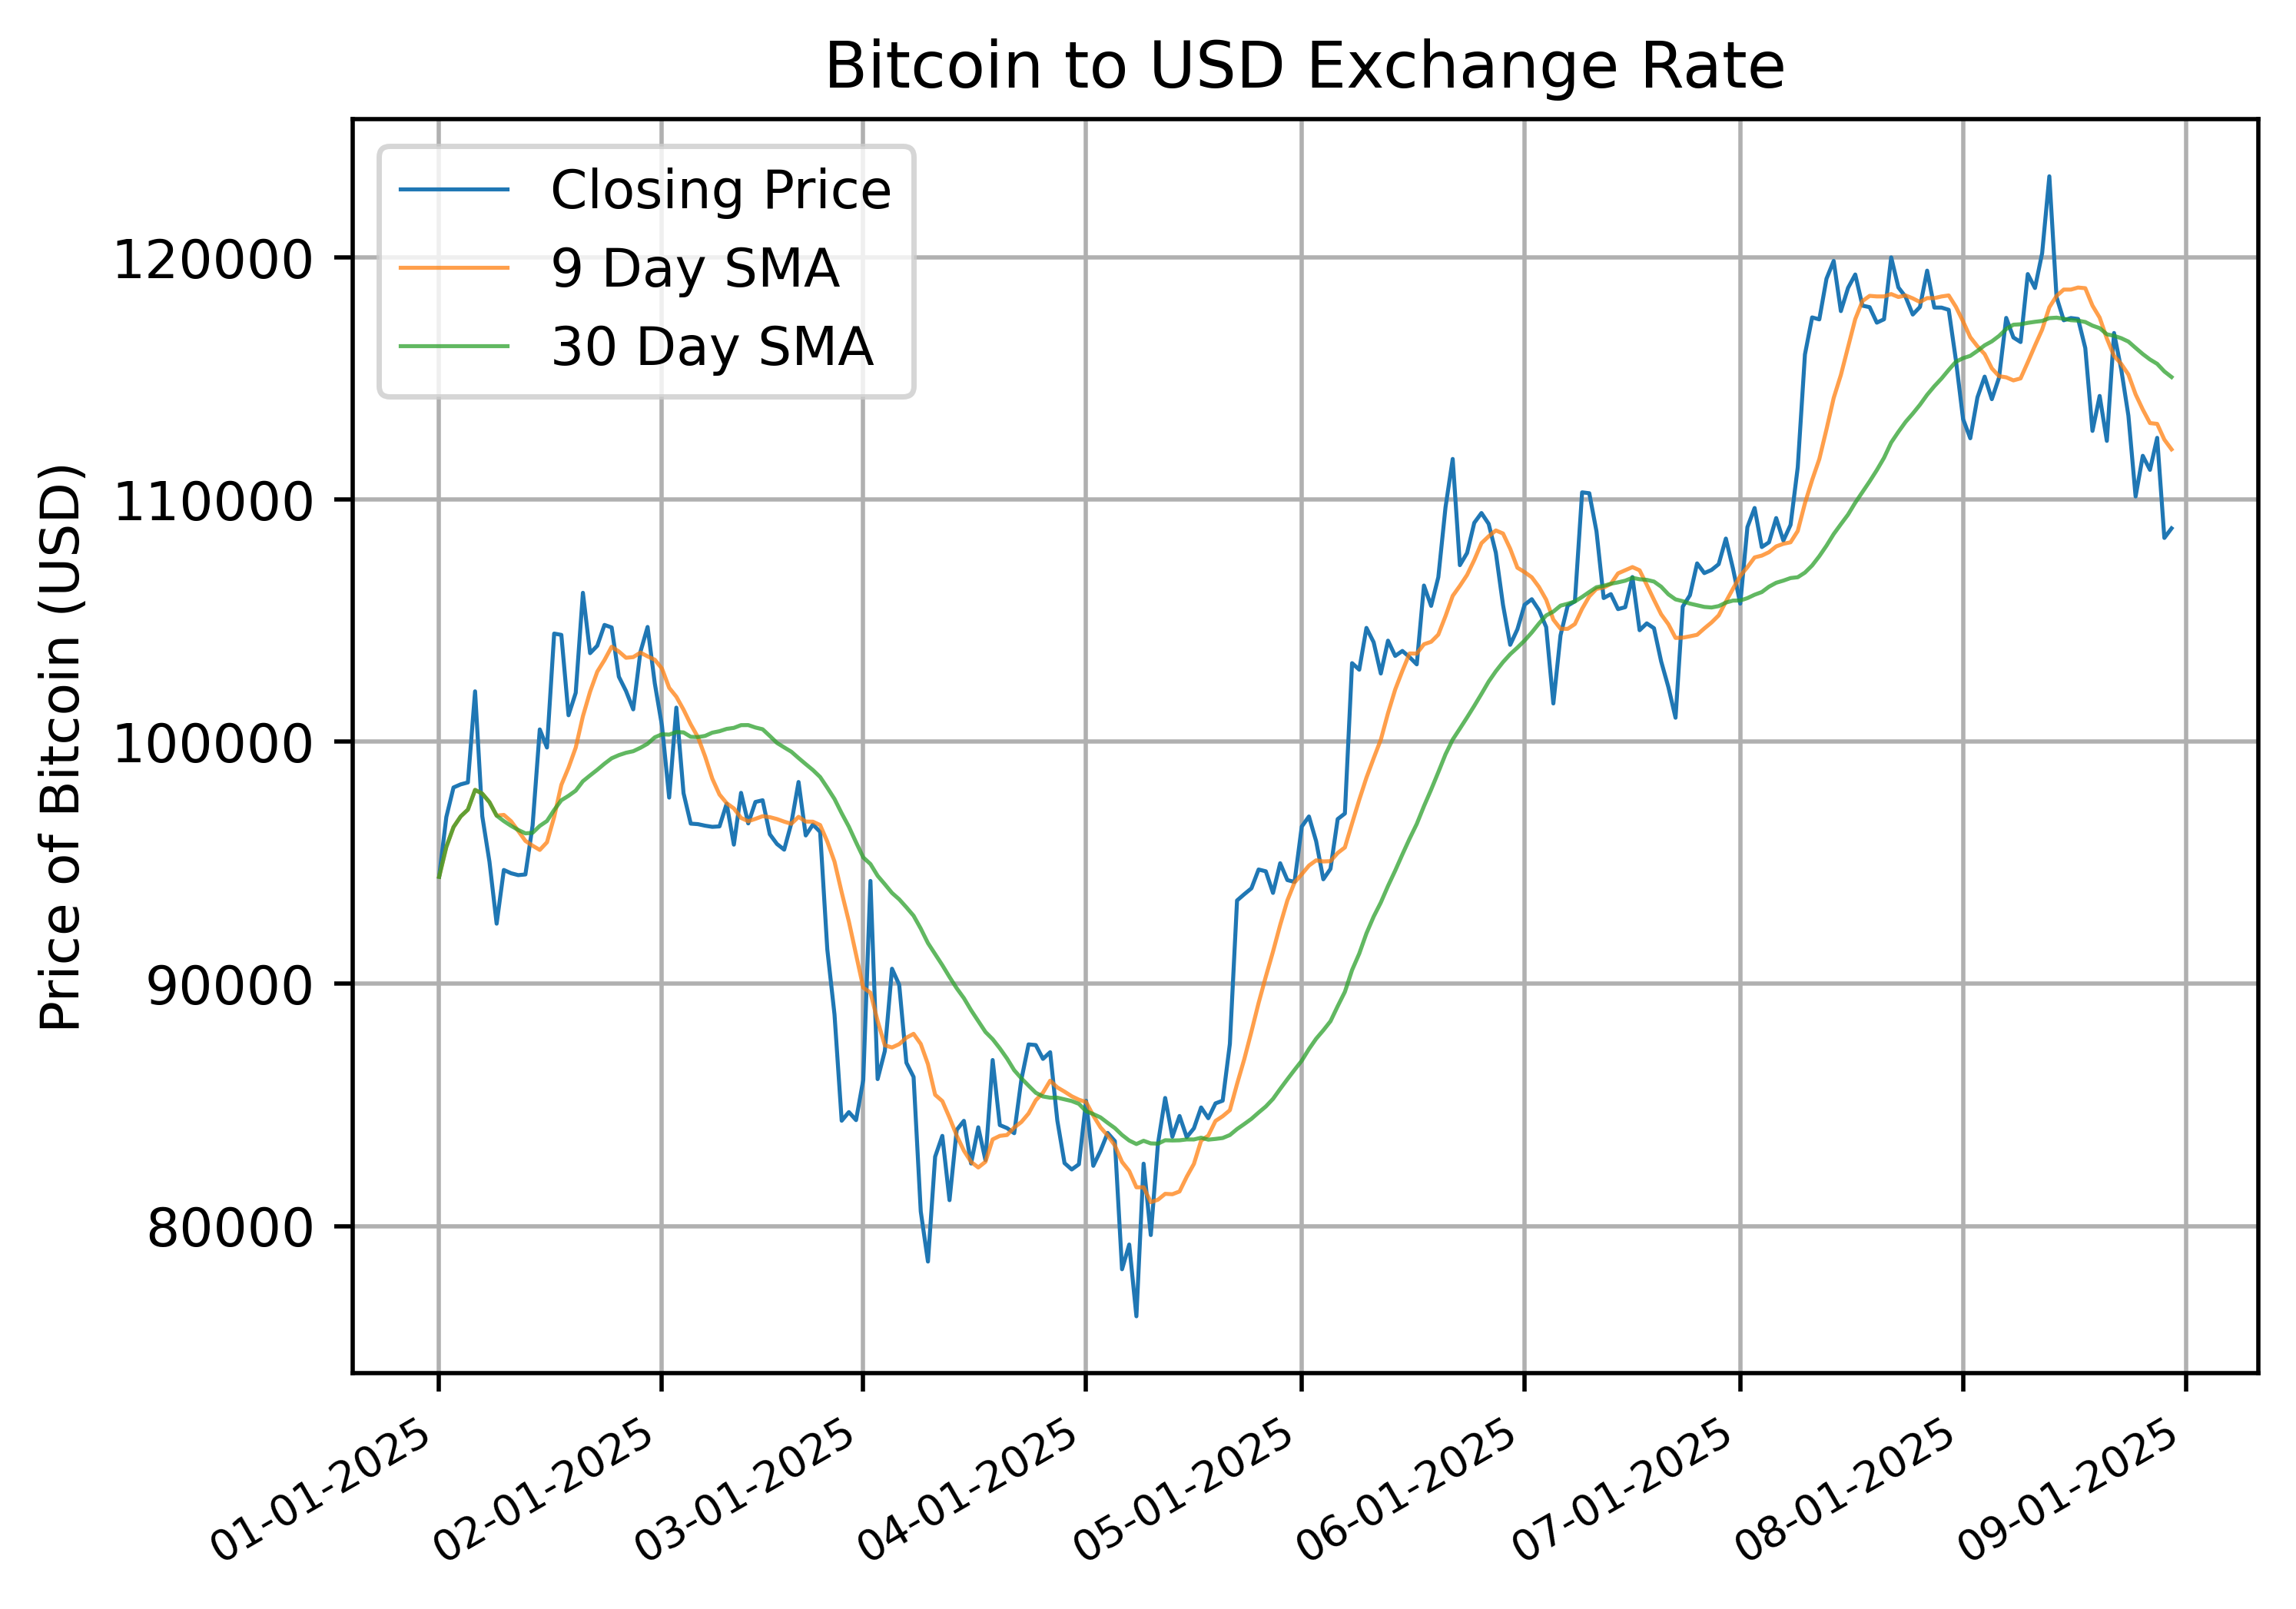

In [ ]:
# Plot the Simple Moving Averages
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() 
ax.legend()

# Displaying the price chart
plt.show()


## 4. Developing the Trading Algorithm, and Visualizing its Signals
We will calculate the 9-day and 30-day SMAs and plot them alongside the price.


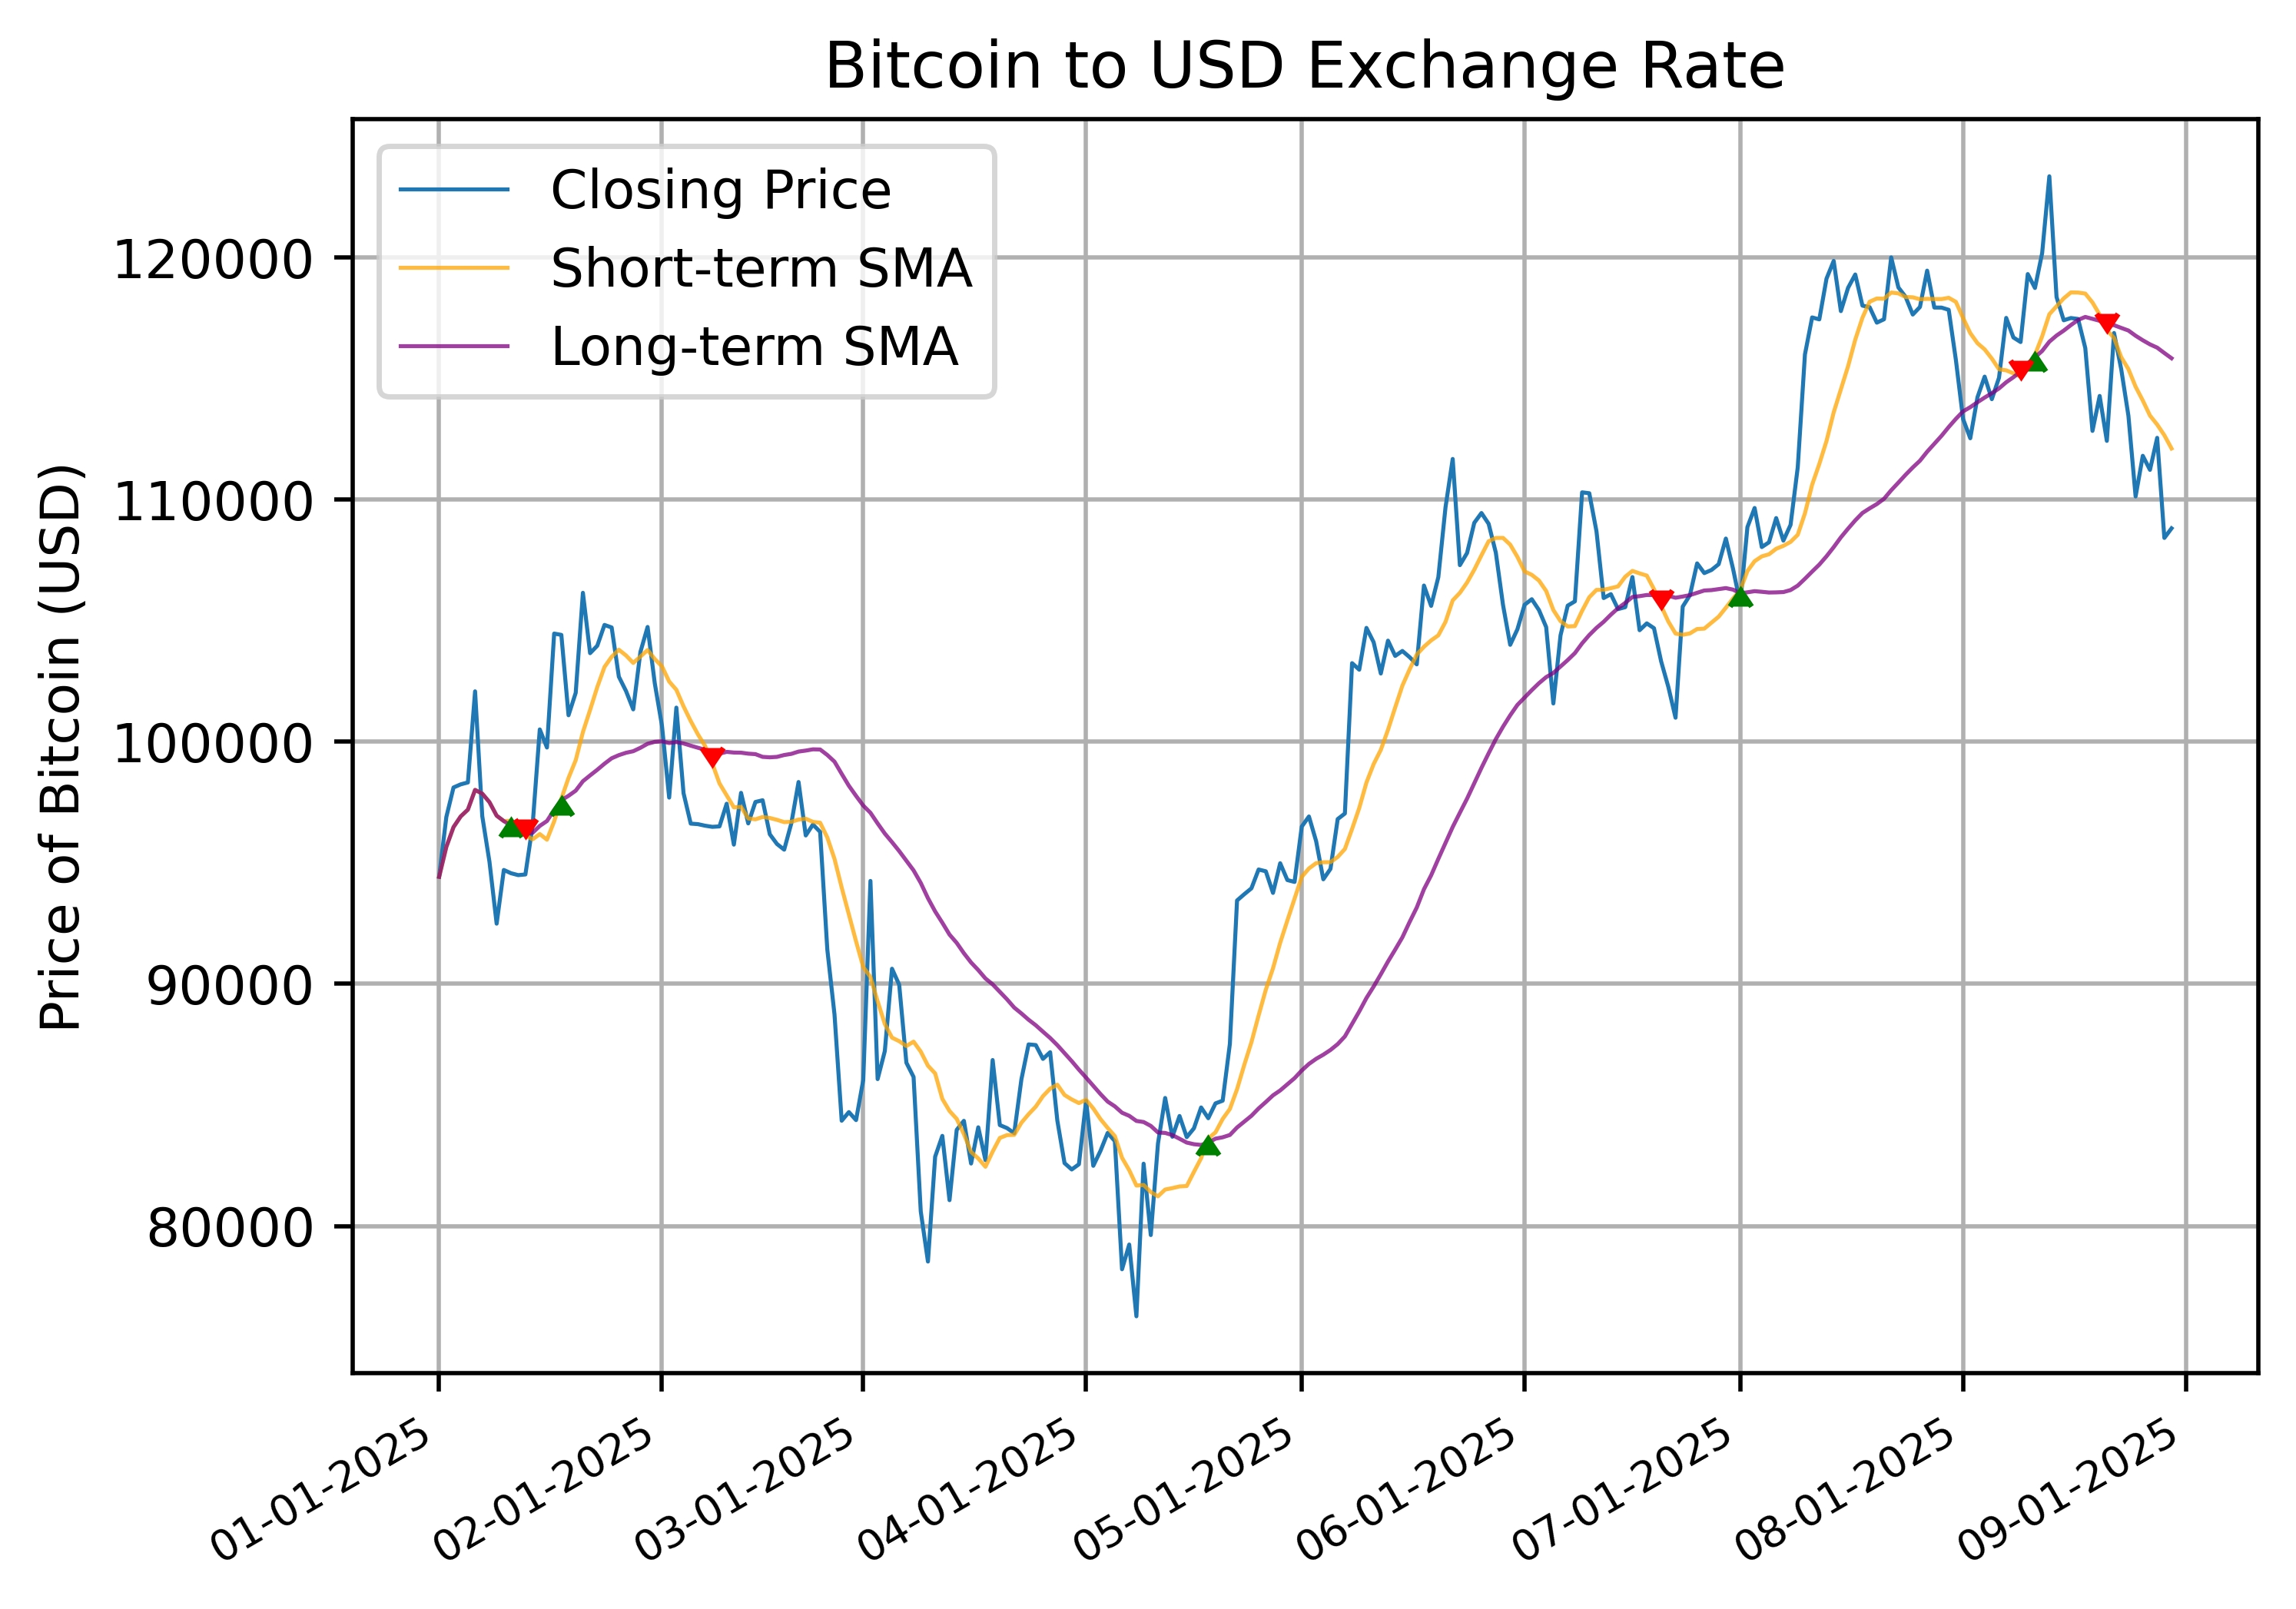

In [ ]:
# Creating a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Defining the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Computing the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

# Creating a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0) 

#Creating a new column in the dataframe for signal positions
trade_signals['Position'] = trade_signals['Signal'].diff()


#Visualizing the algorithms trading signals
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term and longterm moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green and red arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid()
ax.legend()

# Displaying the price chart
plt.show()


## Backesting the algorithm's trading performance
We will compare the algorithm's performance against a buy-and-hold strategy.

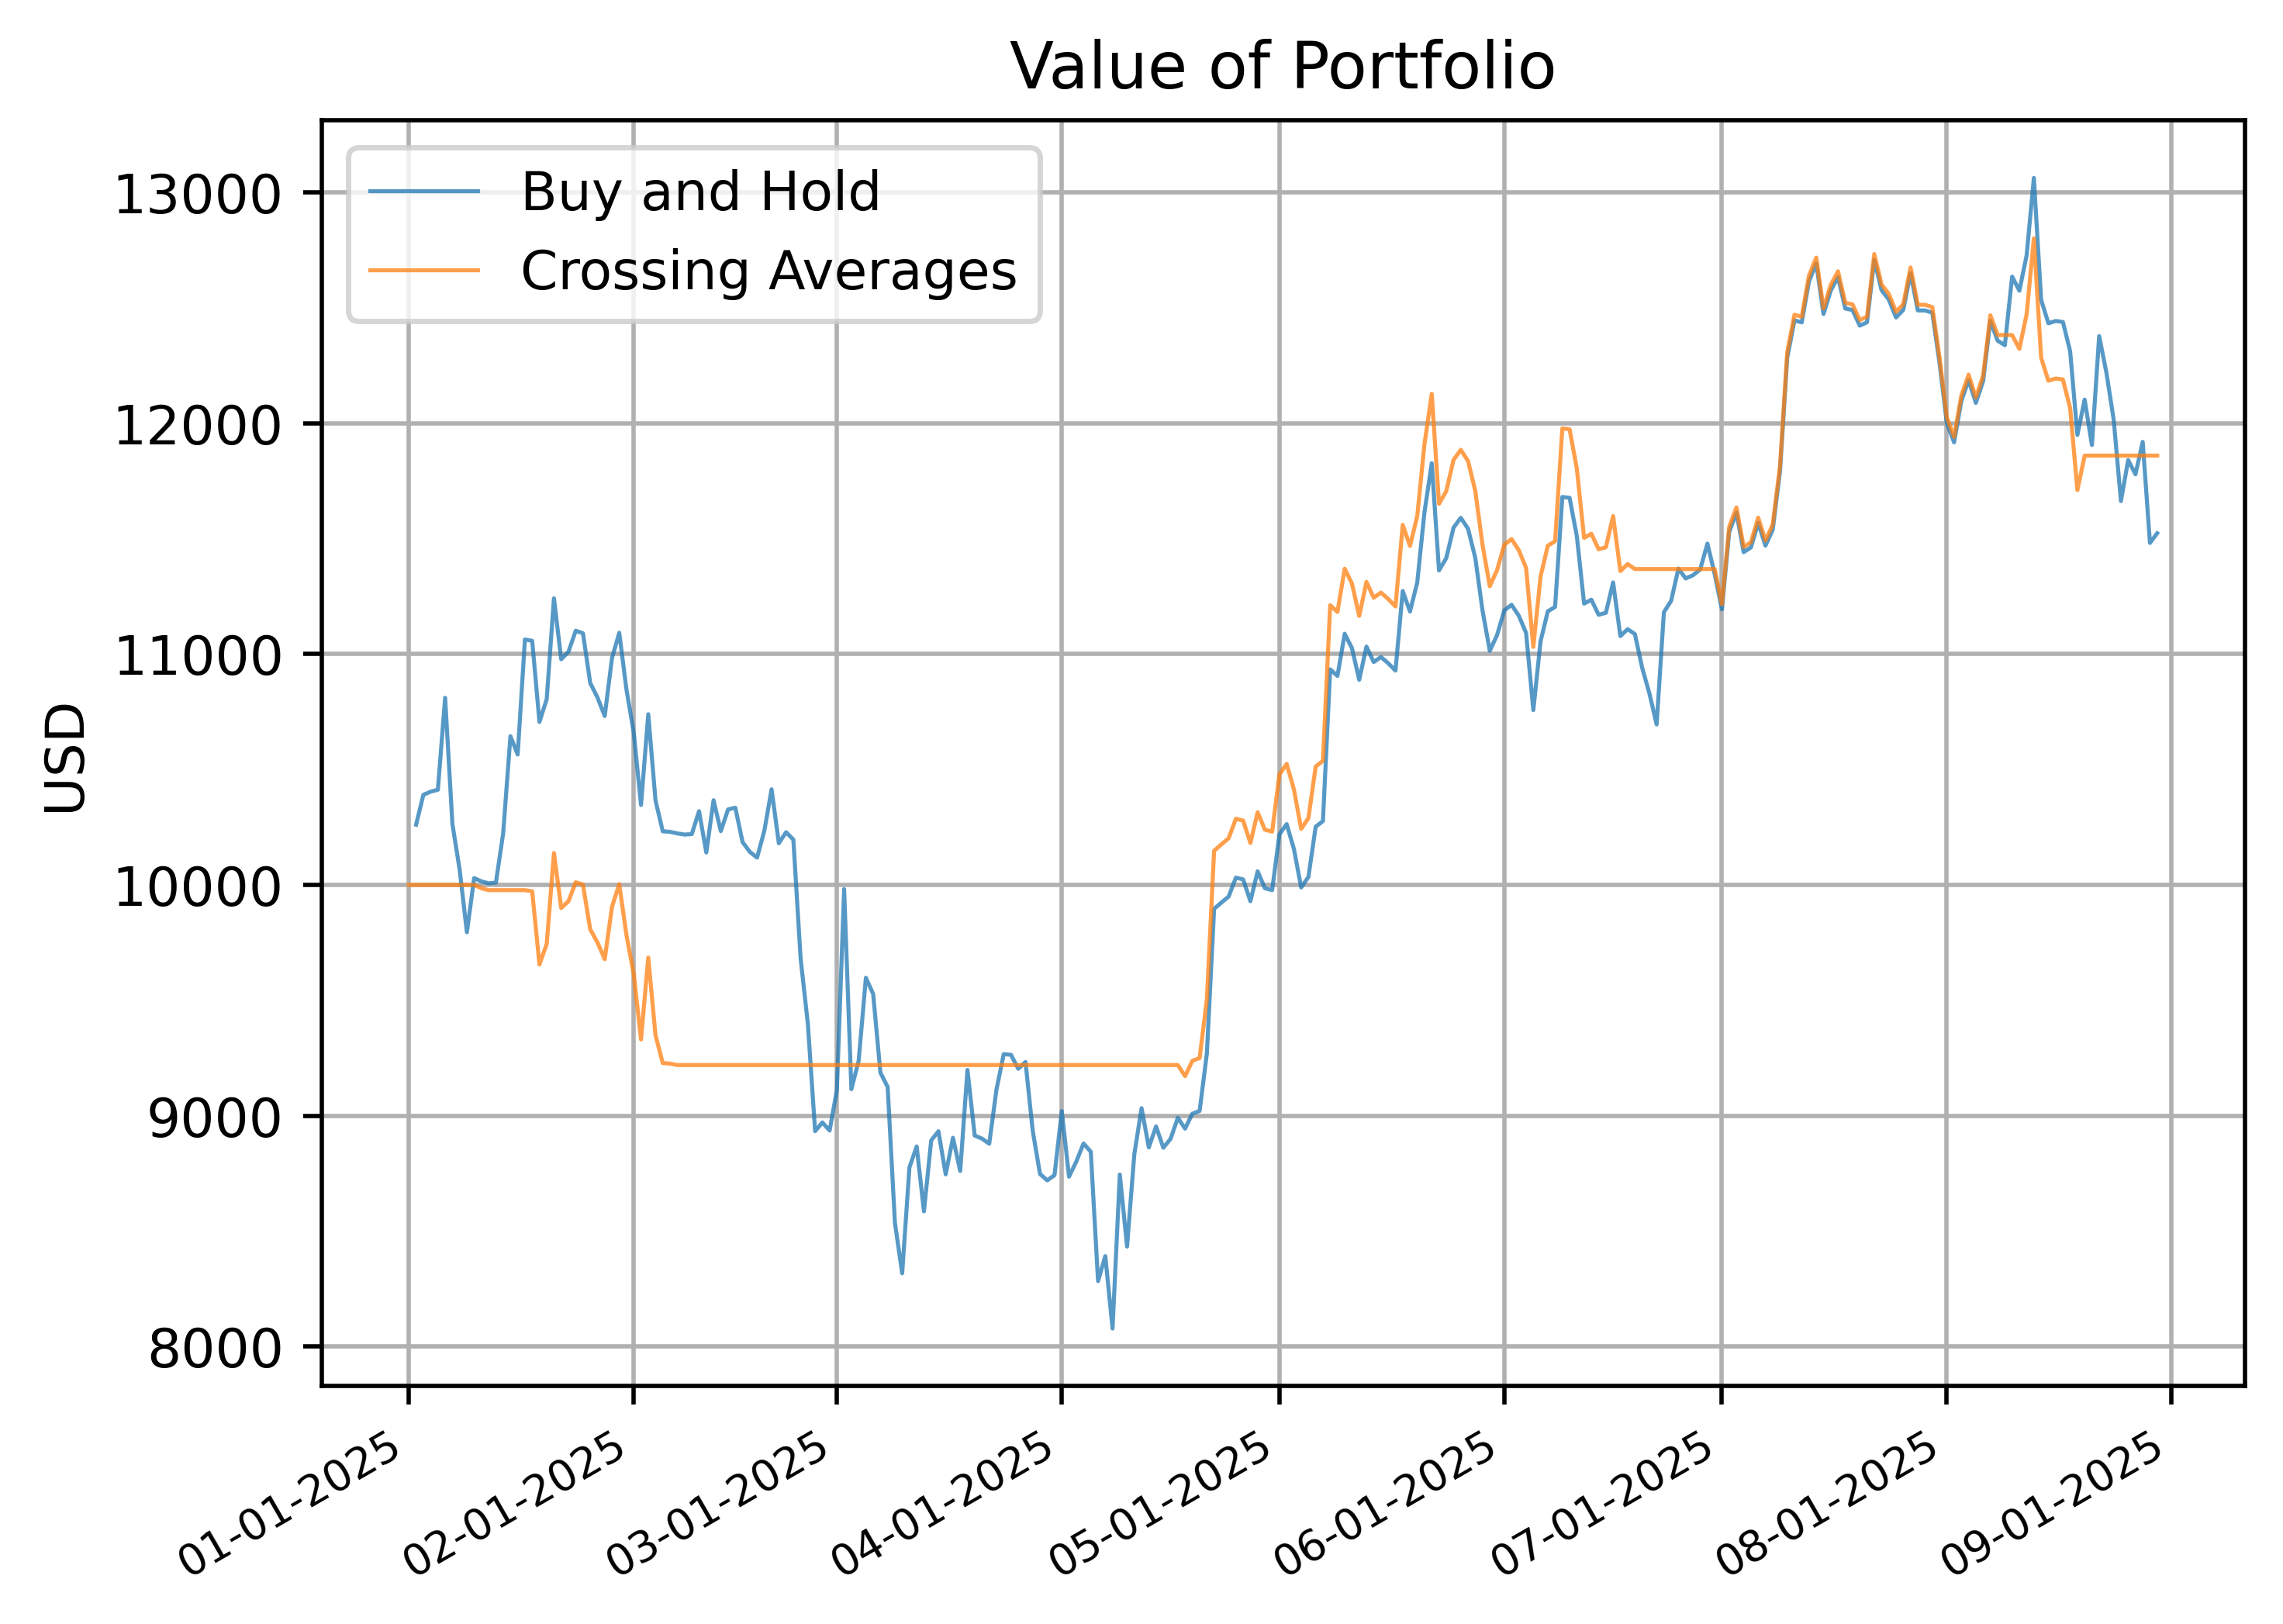

In [ ]:
# Defining how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Creating dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Adding column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price


# Adding column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Adding column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product


# Comparing the algorithm's performance to a simple Buy and Hold Strategy
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%m-%d-%Y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() 
ax.legend() 

# Displaying the price chart
plt.show()

## Summary and Next Steps
- Simple moving averages helped identify trends in the price of Bitcoin. 
- The trading strategy slightly outperformed buy-and-hold. 
- In the future, more indicators and risk metrics will be added.